### Text Classification using Naive Bayes Classifer (Multinomial Naive Bayes)

In [33]:
from sklearn.datasets import fetch_20newsgroups

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import ConfusionMatrixDisplay

import matplotlib.pyplot as plt

#### Dataset

We'll be using the 20 Newsgroups dataset for classification. Lets first download the dataset using the `fetch_20newsgroups` API

In [34]:
data = fetch_20newsgroups()

There are 20 classes in this dataset:

In [35]:
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [36]:
print(data.DESCR)

.. _20newsgroups_dataset:

The 20 newsgroups text dataset
------------------------------

The 20 newsgroups dataset comprises around 18000 newsgroups posts on
20 topics split in two subsets: one for training (or development)
and the other one for testing (or for performance evaluation). The split
between the train and test set is based upon a messages posted before
and after a specific date.

This module contains two loaders. The first one,
:func:`sklearn.datasets.fetch_20newsgroups`,
returns a list of the raw texts that can be fed to text feature
extractors such as :class:`~sklearn.feature_extraction.text.CountVectorizer`
with custom parameters so as to extract feature vectors.
The second one, :func:`sklearn.datasets.fetch_20newsgroups_vectorized`,
returns ready-to-use features, i.e., it is not necessary to use a feature
extractor.

**Data Set Characteristics:**

    =================   ==========
    Classes                     20
    Samples total            18846
    Dimensionality

There are 20 categories/classes in the dataset but for simplicity we'll select just 5 of these categories and download training and test sets.

In [60]:
categories = ["talk.religion.misc", "sci.electronics", "sci.space", "comp.graphics", "rec.motorcycles"]
train_set = fetch_20newsgroups(subset="train", categories=categories)
test_set = fetch_20newsgroups(subset="test", categories=categories)

Lets look at a sample training document:

In [61]:
print(train_set.data[7])

From: glenne@sr.hp.com (Glenn Elmore)
Subject: Re: Single chip receiver for FSK?
Organization: HP Sonoma County (SRSD/MWTD/MID)
X-Newsreader: TIN [version 1.1 PL9.2]
Lines: 78

John Ackermann x 2966 (jra@law7.DaytonOH.NCR.COM) wrote:
: My next project is to come up with an IF/detector module for fast -- 112
: to 250 kB/sec -- packet radio use.  No fancy modulation scheme, just
: wide FSK for use at 902 or 1296 MHz.

: I'm a bit familiar with the Motorola 3362 chip, but I wonder if there
: are newer designs that might work at higher input frequencies.

: My goal is to come up with an inexpensive design for a receiver "back
: end" with IF input on one end and an FSK demondulator on the other.  I'm
: particularly interested in ways to use a higher IF than 10.7 -- do any
: current chips work up to, say 150MHz with internal downconversion so a
: normal IF filter can be used?

: Any suggestions?

: John

  What you describe is very close to what I built and described in the
10th ARRL Compute

#### Data Preprocessing

All of the data that we have from our 20 Newsgroups dataset is text (it is essentially a text classification problem, where we have to predict which of the 20 classes is the most likely for a given piece of text).

We need to convert the text data into a numeric form before we can fit an ML algorithm to it. We can use the `TfidfVectorizer` as preprocessing step to obtain a feature vector corresponsing to the text document. 

We'll be using Multinomial Naive Bayes (which is commonly used for Text Classification) for categorizing the documents from 20Newsgroups corpus.

In [53]:
model = Pipeline([
    ("tfidf", TfidfVectorizer()),
    ("naive_bayes", MultinomialNB())
])

In [62]:
model.fit(train_set.data, train_set.target)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('naive_bayes', MultinomialNB())])

#### Model Evaluation

Let's first predict the labels for the test set and then calculate the confusion matrix for the test set and see how the model performs on the testing data.

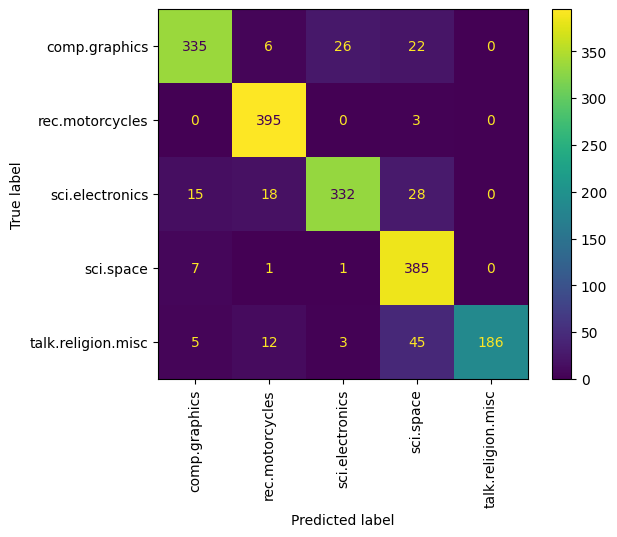

In [63]:
ConfusionMatrixDisplay.from_estimator(
    model, test_set.data, test_set.target,
    display_labels=test_set.target_names,
    xticks_rotation="vertical"
)

plt.show()

The results are fairly ok but it looks like the "religion" category is getting misclassified as "space" quite a lot.

#### Trying out our model to make a few predictions

In [68]:
pred = model.predict(["determining the screen resolution"])
print(pred)
train_set.target_names[pred[0]]

[0]


'comp.graphics'

In [69]:
pred = model.predict(["atheism vs christianity"])
print(pred)
train_set.target_names[pred[0]]

[4]


'talk.religion.misc'

In [70]:
pred = model.predict(["NASA space craft"])
print(pred)
train_set.target_names[pred[0]]

[3]


'sci.space'